# Does staying in school (and not working) prevent teen smoking and drinking? 

### [by Robert Jensen (2012) published in Journal of Health Economics](https://www.sciencedirect.com/science/article/pii/S0167629612000586#tbl0005)

## Abstract 

The aim of the paper by Robert Jensen is to identify the relationship between education and health behavior, namely that education improves health behavior. The radomized experiment was conducted by providing youth with information on return to schooling. He found that treated students were less likely to smoke at age of 18 and delayed the habbit of everyday drinking. These differences between treated and control groups are mainly explained by independent variables as peer networks and disposable income. This simulation study uses descriptive statistics from the Robert Jensen's paper to generate data and predict drinking and smoking among the Dominican students using random forest. 

## Introduction 

The storng assosication between education and health behavior was shown in many papers. This paper uses information on return to shcooling as a treatment, because students from developing countries are not well informed about true returns to schooling. If students underestimate the returns to schooling, the provision of information on the true returns alone may affect students' completed years of education. Author, by providing information on returns on schooling, has found increase in the schooling among male students in Dominican Republic and later he established that treated students smokes less at age 18 and start drinking later than their untreated peers.

The survey also collected data on a number of potential determinants of drinking and smoking that will allow to understand the mechanisms through which schooling affects these behaviors. The mechanisms are the behavior of peer networks, discretionary income, rates of time preference, attitudes towards risk, and perceptions of the health consequences of these behaviors. First, youths who drop out of school and enter the labor market will have more income at their disposal, which makes it easier to afford alcohol and tobacco. Second, schooling may change the youths’ peer sets. Youths who stay in school will spend a significant fraction of their time with peers who are also in school, and thus for example of a similar age. By contrast, those who drop out may spend more time with older people, such as in the workplace. Third, schooling may directly affect knowledge of the health risks of drinking and smoking. For example, high schools may have required “health” classes that provide information on the health risks. Fourth, schooling may affect an individual's rate of time preference or attitude towards risk (Fuchs, 1982), because for example schooling instills particular values, and it requires discipline and patience. In light of this discussion, it is not likely to be possible or even meaningful to talk about the pure effects of schooling on health behaviors, because leaving school in some but not all cases means entering the labor force, and it may be that it is what happens in the workplace, rather than what happens in school, that affects whether a teen drinks or smokes. Thus, the analysis will focus on the combined effects of work and school.

The data focuses on the period of adolescence, the period during which both drinking and smoking typically start; most individuals have already tried alcohol by their early teens, and most adult smokers begin smoking before the age of 18. Thus, this age range is a particularly important one to study. And there are several other reasons why smoking and excessive drinking among teens is of particular concern. First, the health consequences of these behaviors are a function of exposure, so even just delaying initiation will also delay the onset of the adverse health consequences, and thus increase life expectancy. Second, delaying initiation of smoking reduces the likelihood of ever smoking (Gruber and Zinman, 2001, Auld, 2005). Finally, recent evidence from the medical and biology literature suggests that brain development, which is not complete during the teen years, is sensitive to alcohol and nicotine; thus drinking and smoking among teens may have more severe long-term impacts, even compared to such behaviors among adults. To the extent that adolescents aren’t fully informed of these costs or are unable to make fully rational decisions, preventing adolescents from engaging in these behaviors is a worthwhile public policy goal.

## Data

The sample was drawn in two stages. First, from the 30 largest cities and towns (representing about two-thirds of the population), author chose 150 sampling clusters at random, with the number of clusters chosen in each city or town approximately proportional to its share of the combined population of the 30 cities/towns. For each of the 150 clusters, he selected the school where students from that cluster attend 8th grade, the final year of primary school. From each school he selected 15 boys at random from a list of all currently enrolled 8th grade students. All 2011 students were administered a survey between April and May 2001, close to the end of the academic year, gathering information on a variety of individual and household characteristics, as well as some simple questions on expected earnings by education.


A second survey was conducted shortly after the beginning of the next academic term (October 2001), with respondents interviewed again about perceived returns to education and current enrolment status, as well as health-related behaviors. A third round, follow-up survey was conducted in May and June of 2005, by which time students should have been finishing their last year of secondary school; for the approximately 120 students still enrolled in 2005 but not yet in their final year of school (due primarily to grade repetition), he conducted follow-ups for the next 2 years. He was able to re-interview 94% of youths in round 2 and 89% in round 3 (though for the educational outcomes, we were able to track students administratively even if we did not interview them, which reduced attrition to 3 and 9%, respectively). Attrition rates were very similar for treatment and control youths; in round 2, he was able to re-interview 1053 of the 1125 control students and 1057 of the 1125 treatment students, and in round 3, he was able to re-interview 1006 of the controls and 1005 of the treatment sample. 

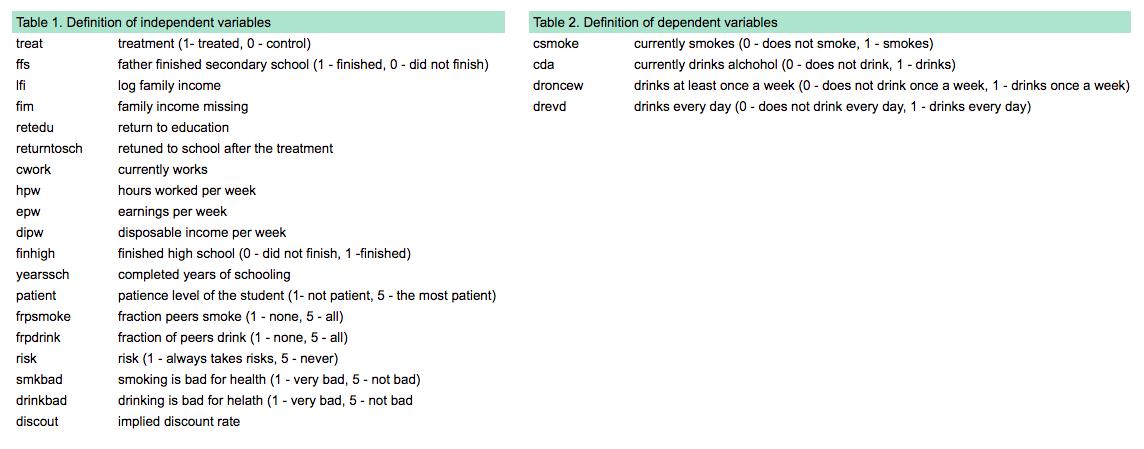

In [12]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(rsample)     
library(randomForest) 
library(ranger)       
library(caret)        
#library(h2o) 
library(e1071)
library(lattice)
library(fields)
library(ROCR)

## Descriptive statistics 



There is a large drop-out rate (42%) at the end of primary school (between baseline and round 2), and only 32% of the students attending school in 8th grade eventually graduate from high school. About 30% of the sample works in round 2. However, work is not exclusive to those who have dropped out: 19% of boys work and do not attend school, while 10% both attend school and work (47% attend school only and 22% are idle).

In [15]:
source('auxiliary/dgp.cda2.r')
source('auxiliary/dgp.cda3.r')
source('auxiliary/dgp.csmoke2.r')
source('auxiliary/dgp.csmoke3.r')

In [16]:
head(cda2.data)
head(cda3.data)

cda2,ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,dipw2,treat,frpsmoke2,frpdrink2
drinks,1,7.962462,0.7625195,14.68612,0,1,3.558822,87.69874,11.03915,0,2,2
does not drink,1,8.154372,2.5876348,14.40978,0,0,0.000000,0.00000,46.94968,0,3,3
does not drink,0,8.243654,1.5797617,14.31530,1,0,0.000000,0.00000,32.94009,0,4,2
drinks,0,8.358480,1.0660269,13.71285,1,1,3.767111,270.38603,94.91425,1,3,4
drinks,1,7.649643,2.0540595,15.32231,1,1,7.867796,127.03666,14.74702,1,2,2
does not drink,0,8.276139,3.1285064,12.83894,0,0,0.000000,0.00000,15.61778,1,2,5


cda3,ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
drinks,0,8.084168,1.050690,17.01666,0,0,5.715281,1,5.697273,227.1129,41.33082,1,4,5,2,4,2
drinks,0,7.882907,2.209172,16.58966,0,1,8.191589,1,11.800430,277.0841,981.72380,2,5,3,4,3,3
does not drink,1,7.906745,2.985610,16.94479,0,1,11.203076,0,0.000000,0.0000,19.48023,2,3,5,3,3,2
drinks,1,7.751295,1.179323,18.16647,0,0,11.834382,0,0.000000,0.0000,302.58276,2,5,4,3,3,3
drinks,1,7.718370,1.575366,17.52121,1,0,11.916051,0,0.000000,0.0000,263.52000,3,3,3,3,3,2
drinks,0,8.009278,1.004580,17.37981,1,1,9.101146,0,0.000000,0.0000,445.03104,3,2,5,2,4,3


Only 5% of boys reported smoking in round 2, but this increases to 13% by round 3. By contrast, drinking alcohol is more widespread: in round 2, when most of the sample is 14 years old, 61% of boys already report drinking. Although that fraction rises only to 73% in round 3, the frequency of drinking increases substantially; the fraction reporting they drink every week increases from 19% to 46%, and the fraction reporting they drink every day increases from 2% to 13%.

For adults, moderate amounts of alcohol may not have adverse health consequences; the greater concern is over excessive or binge drinking. However, for the young adolescents we focus on, alcohol consumption may have important consequences in even smaller amounts, as noted in the introduction. And in particular, the analysis is focused primarily on daily drinking, which is likely to constitute a greater concern.

In [17]:
head(csmoke2.data)
head(csmoke3.data)

csmoke2,ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,dipw2,treat,frpsmoke2,frpdrink2
does not smoke,0,7.822502,0.303665,12.62227,1,0,0.000000,0.000000,103.52281,1,3,2
does not smoke,1,8.334673,1.820802,14.66452,0,1,4.062576,3.093078,85.80941,0,2,4
does not smoke,0,8.125654,3.531668,13.54371,0,1,21.935253,40.948380,29.73948,1,4,4
does not smoke,0,8.164330,3.373101,14.35035,0,1,8.350340,35.398547,126.15415,0,2,2
does not smoke,0,7.809363,1.068580,13.30952,0,0,0.000000,0.000000,84.82053,1,1,3
does not smoke,0,8.294951,1.092789,14.48506,1,0,0.000000,0.000000,57.24632,0,3,4


csmoke3,ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
smokes,0,7.785719,1.0738845,17.29251,0,0,12.603430,1,2.519728,2039.8265,195.25548,1,2,4,3,4,1
smokes,0,8.059490,0.6281025,17.61702,0,1,8.292283,0,0.000000,0.0000,1076.44683,3,2,5,3,3,2
smokes,1,8.205233,1.3659801,16.84884,0,0,7.953947,0,0.000000,0.0000,971.56531,2,4,4,3,4,3
does not smoke,0,8.094215,2.4511076,17.12538,1,0,9.146961,1,1.959380,213.9853,356.01734,3,3,3,2,4,3
does not smoke,0,7.943829,2.5159197,16.79679,0,0,10.880439,1,7.078686,184.0896,3.66511,3,3,5,1,5,3
does not smoke,0,8.017379,1.5268962,17.32099,1,0,9.263739,0,0.000000,0.0000,201.65674,3,2,2,4,3,3


As noted above, the survey gathered data on several of the mechanisms through which schooling and work may affect drinking and smoking: disposable income, patience, risk aversion, peer behavior and perceptions of harm associated with smoking and drinking. 

Those who work have more disposable income. Education and work are highly correlated with reported peer behavior: working is associated with a larger share of peers that smoke and drink, while the opposite holds for years of schooling. Patience and risk aversion are correlated with schooling, as one would expect, but these correlations are small. Correlations with perceptions of harm are very small. The more educated are slightly more likely to report that smoking is harmful, but surprisingly, they are less likely to report drinking is harmful. 

In [18]:
print('Structure of the independent variables in the third round')
str(cda3.data)
print('Structure of the independent variables in the third round')
str(csmoke3.data)

[1] "Structure of the independent variables in the third round"
'data.frame':	2011 obs. of  18 variables:
 $ cda3     : Factor w/ 2 levels "does not drink",..: 2 2 1 2 2 2 2 2 1 2 ...
 $ ffs      : Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 1 2 2 ...
 $ lfi      : num  8.08 7.88 7.91 7.75 7.72 ...
 $ perf     : num  1.05 2.21 2.99 1.18 1.58 ...
 $ age      : num  17 16.6 16.9 18.2 17.5 ...
 $ treat    : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 2 2 1 1 ...
 $ finhigh  : Factor w/ 2 levels "0","1": 1 2 2 1 1 2 1 1 1 1 ...
 $ yearssch : num  5.72 8.19 11.2 11.83 11.92 ...
 $ cwork3   : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 2 1 1 1 ...
 $ hpw3     : num  5.7 11.8 0 0 0 ...
 $ epw3     : num  227 277 0 0 0 ...
 $ dipw3    : num  41.3 981.7 19.5 302.6 263.5 ...
 $ patient3 : Factor w/ 5 levels "1","2","3","4",..: 1 2 2 2 3 3 2 1 2 3 ...
 $ frpsmoke3: Factor w/ 5 levels "1","2","3","4",..: 4 5 3 5 3 2 1 3 3 3 ...
 $ frpdrink3: Factor w/ 5 levels "1","2","3","4",..: 5 3 5 4 3 5 3 5 4 3 ...
 $ 

In order to establish the commonly found relationship between education and health behaviors in data set, and for comparison with the experimental results, researcher starts by estimating least squares regressions of smoking and daily drinking on education and work status, using individuals in the control group only. For each outcome, he presents three separate regressions: first including years of school only, then only with an indicator for work status, and finally with both work and years of schooling, and his measures of possible mechanisms. All regressions also include the following baseline covariates: father's education, log of family income and teacher's reports of student performance in school.

The table below shows results of the OLS regressions of smoking and drinking on schooling and work in round 3 (control group only).

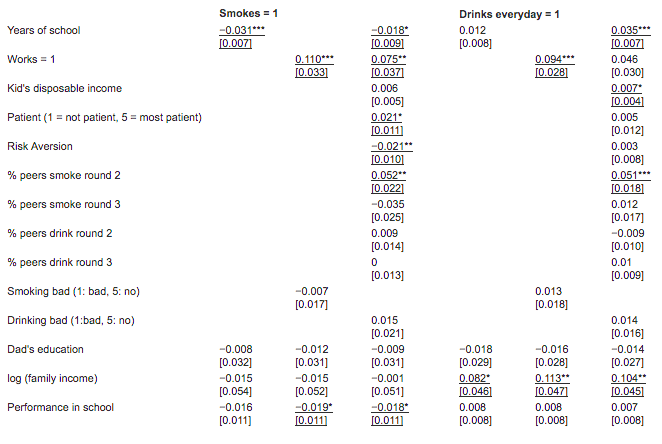

Researcher finds that education is associated with a lower likelihood of smoking, and that work results in a higher likelihood of smoking, and these effects are statistically significant when included individually or jointly. Education and work both appear to increase daily drinking – and the effect of education actually increases when we control for work status and for mechanisms. 

## Method

A dependent variable and most of the independent variables are qualitative, so there is a classification problem. There many classification algorithms as logistic regression, naive Bayes classifier and decision trees. It is well known that random forest is among the best methods because of 'wisdom of crowds': the large number of relatively uncorrelated trees combined together will outperform the single model. Therefore, this simulation study was conducted using random forest. The random forest was used, because decision tree is sensitive to small changes in the data, it suffers from high variance and overfitting. Since the aim of this simulation study is to predict the smoking and drinking among the Domonican students, prediction accuracy is very important. The reduction in variance, which leads to better prediction accuracy, can be achieved by taking repeated samples from the training data set and averaging the set of predictions. Since the dependent outcome is bianry, the prediction is decided by majority vote: the final answer is the most commonly occuring class in all of the N trees.  

## Results

##### Currently drinks round 2

In this section, random forest will predict whether a randomly chosen student currently smokes or not using the informarion of the second round survey. 

In [21]:
rf.cda2<-randomForest(cda2.data$cda2~., data=cda2.data[-1],proximity=T, importance=T, metric='Accuracy', nodes=T)
rf.cda2


Call:
 randomForest(formula = cda2.data$cda2 ~ ., data = cda2.data[-1],      proximity = T, importance = T, metric = "Accuracy", nodes = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 5.97%
Confusion matrix:
               does not drink drinks class.error
does not drink            751     67  0.08190709
drinks                     53   1140  0.04442582

We can see from the summary above that the out-of-bag error rate is equal to 5.97%, when the random forest runs 500 trees and uses 3 varibles at each split. The confusion matrix gives information on how good each of the outcomes preidcted, in other words specifies the type one and and type two errors. To make sure that default settings of the random forest uses best parameters, I will run several tests below. Firstly, the number of trees should be checked. The summary above shows that there were used 500 trees to run the random forest. Let's plot the error rates graph to compare results with different amount of trees. 

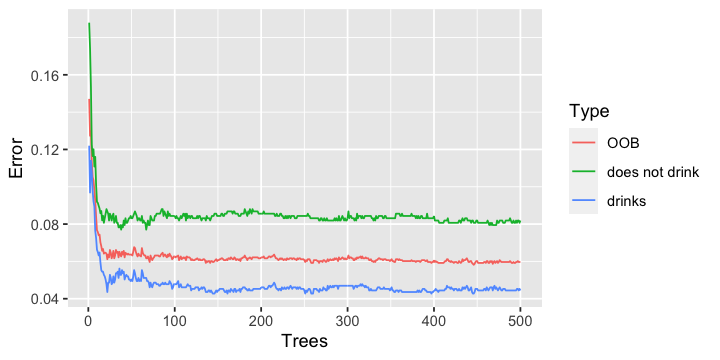

In [24]:
#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.cda2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink", "drinks"), each=nrow(rf.cda2$err.rate)),
    Error=c(rf.cda2$err.rate[,"OOB"],
           rf.cda2$err.rate[,"does not drink"],
           rf.cda2$err.rate[,'drinks']))
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=6, repr.plot.height=3)

The graph above depicts classification errors of students that assigned as 'drinks' and 'does not drink', and out-of-bag error rate. It can be noticed that the model makes more false classifications for group 'does not drink'. The main reason behind this could be that 61% of the students answered that they drink alchohol, so the tree tries to predict more drinking to decrease the misclassification. Now, let's construct the same graph for the radom forest with 1000 trees. 


Call:
 randomForest(formula = cda2.data$cda2 ~ ., data = cda2.data[-1],      proximity = T, ntree = 1000, importance = T) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 5.92%
Confusion matrix:
               does not drink drinks class.error
does not drink            751     67  0.08190709
drinks                     52   1141  0.04358759

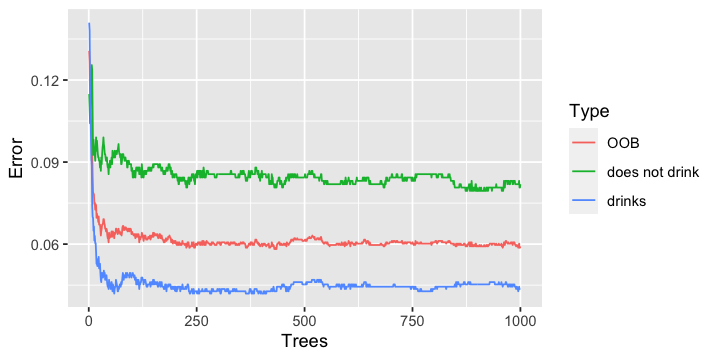

In [25]:
rff.cda2<-randomForest(formula=cda2.data$cda2~., data=cda2.data[-1],proximity=T, ntree=1000, importance=T)
rff.cda2
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rff.cda2$err.rate), times=3),
    Type=rep(c("OOB", "does not drink", "drinks"), each=nrow(rff.cda2$err.rate)),
    Error=c(rff.cda2$err.rate[,"OOB"],
           rff.cda2$err.rate[,"does not drink"],
           rff.cda2$err.rate[,'drinks']))


#plot ntree=1000 to see if 1000 trees decrease the error rate
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=6, repr.plot.height=3)

It can be clearly seen that adding more trees smoothes the error rate, which should lead to better results. A small decrease in OOB error rates can be noticed by comparing two random forests with different number of trees. 

We have on more parameter that can affect the outcomes of the random forest, which is the number of parameters to be considered in every tree. Usually, it is the square root of the number of independent variables in the model, that's why the random forest gives the default of 3 in the first model. I estimsted best mtry value using two functions below and both of them give approximately the same results. 

In [131]:
tuneRF(cda2.data, cda2.data$cda2)

mtry = 3  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0.05% 
-Inf 0.05 
Searching right ...
mtry = 6 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


The built in function shows that when we consider either 3 or 6 variables in each tree, we will get the lowest error rate. And the fuction below supports the findings of the built in function, because graph shows that the lowest OOB error rate is achieved at mtry=6. 

[1] 0.08304326 0.06414719 0.05867727 0.06016907 0.06066634 0.05768274
 [7] 0.05967181 0.05917454 0.06066634 0.06166087 0.06066634 0.06066634

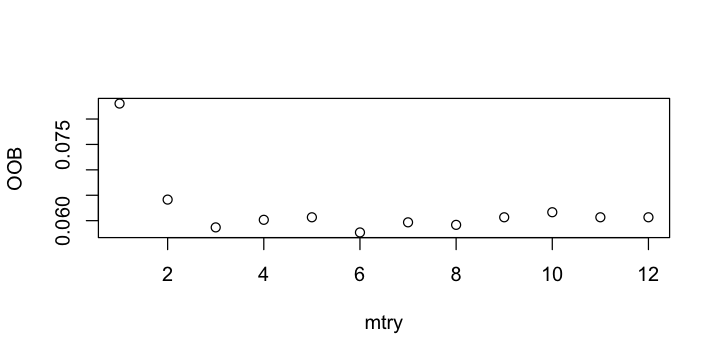

In [26]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=12)
for (i in 1:12) {
    temp.model<-randomForest(cda2.data$cda2~., data=cda2.data, mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "mtry", 
     ylab = "OOB")
options(repr.plot.width=3, repr.plot.height=3)

Since all the 'best' parameters have been found, let's insert them into the initial model and compare the results:

In [32]:
# results with all tuned values inserted
rf.cda22<-randomForest(cda2.data$cda2~., data=cda2.data[-1],proximity=T, importance=T, metric='Accuracy', nodes=T, 
                      ntree=1000, mtry=3)
rf.cda22


Call:
 randomForest(formula = cda2.data$cda2 ~ ., data = cda2.data[-1],      proximity = T, importance = T, metric = "Accuracy", nodes = T,      ntree = 1000, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 5.92%
Confusion matrix:
               does not drink drinks class.error
does not drink            750     68  0.08312958
drinks                     51   1142  0.04274937

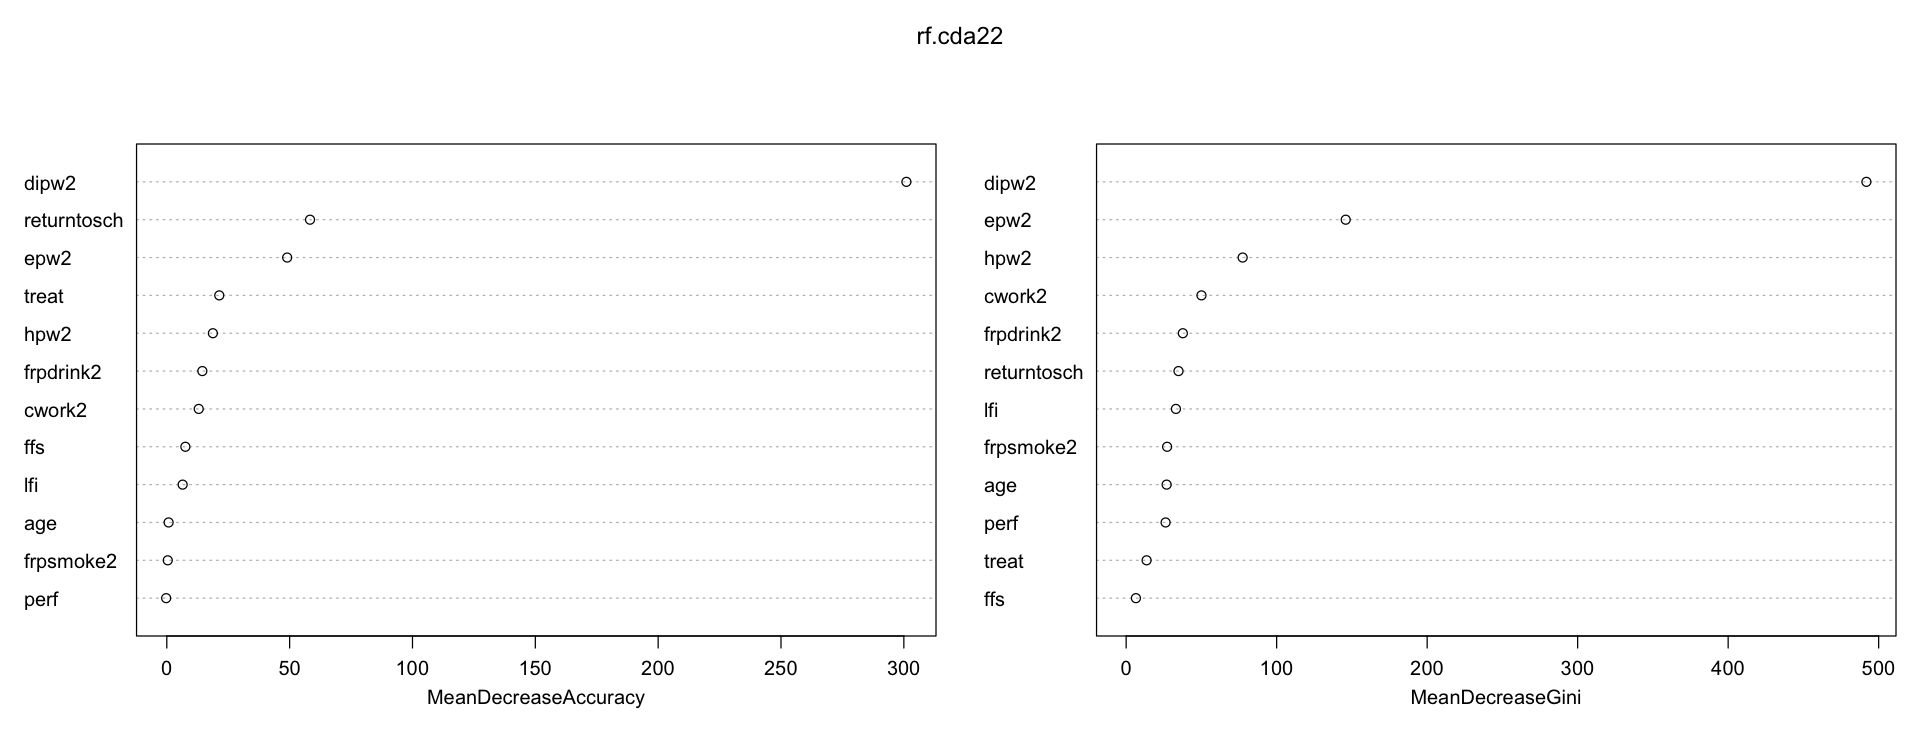

In [139]:
varImpPlot(rf.cda22)
options(repr.plot.width=16, repr.plot.height=6.1)

Higher the value of mean decrease accuracy or mean decrease gini score , higher the importance of the variable in the model

Mean Decrease Accuracy - How much the model accuracy decreases if we drop that variable.
Mean Decrease Gini - Measure of variable importance based on the Gini impurity index used for the calculation of splits in trees.

In [140]:
n=2011
cda2.test<-dgp.cda2(n)
rf.cda2.pred<-predict(rf.cda22, cda2.test)
confusionMatrix(rf.cda2.pred, cda2.test$cda2)

Confusion Matrix and Statistics

                Reference
Prediction       does not drink drinks
  does not drink            743     47
  drinks                     58   1163
                                          
               Accuracy : 0.9478          
                 95% CI : (0.9371, 0.9571)
    No Information Rate : 0.6017          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8908          
                                          
 Mcnemar's Test P-Value : 0.3291          
                                          
            Sensitivity : 0.9276          
            Specificity : 0.9612          
         Pos Pred Value : 0.9405          
         Neg Pred Value : 0.9525          
             Prevalence : 0.3983          
         Detection Rate : 0.3695          
   Detection Prevalence : 0.3928          
      Balanced Accuracy : 0.9444          
                                          
       

A performance instance
  'Area under the ROC curve'

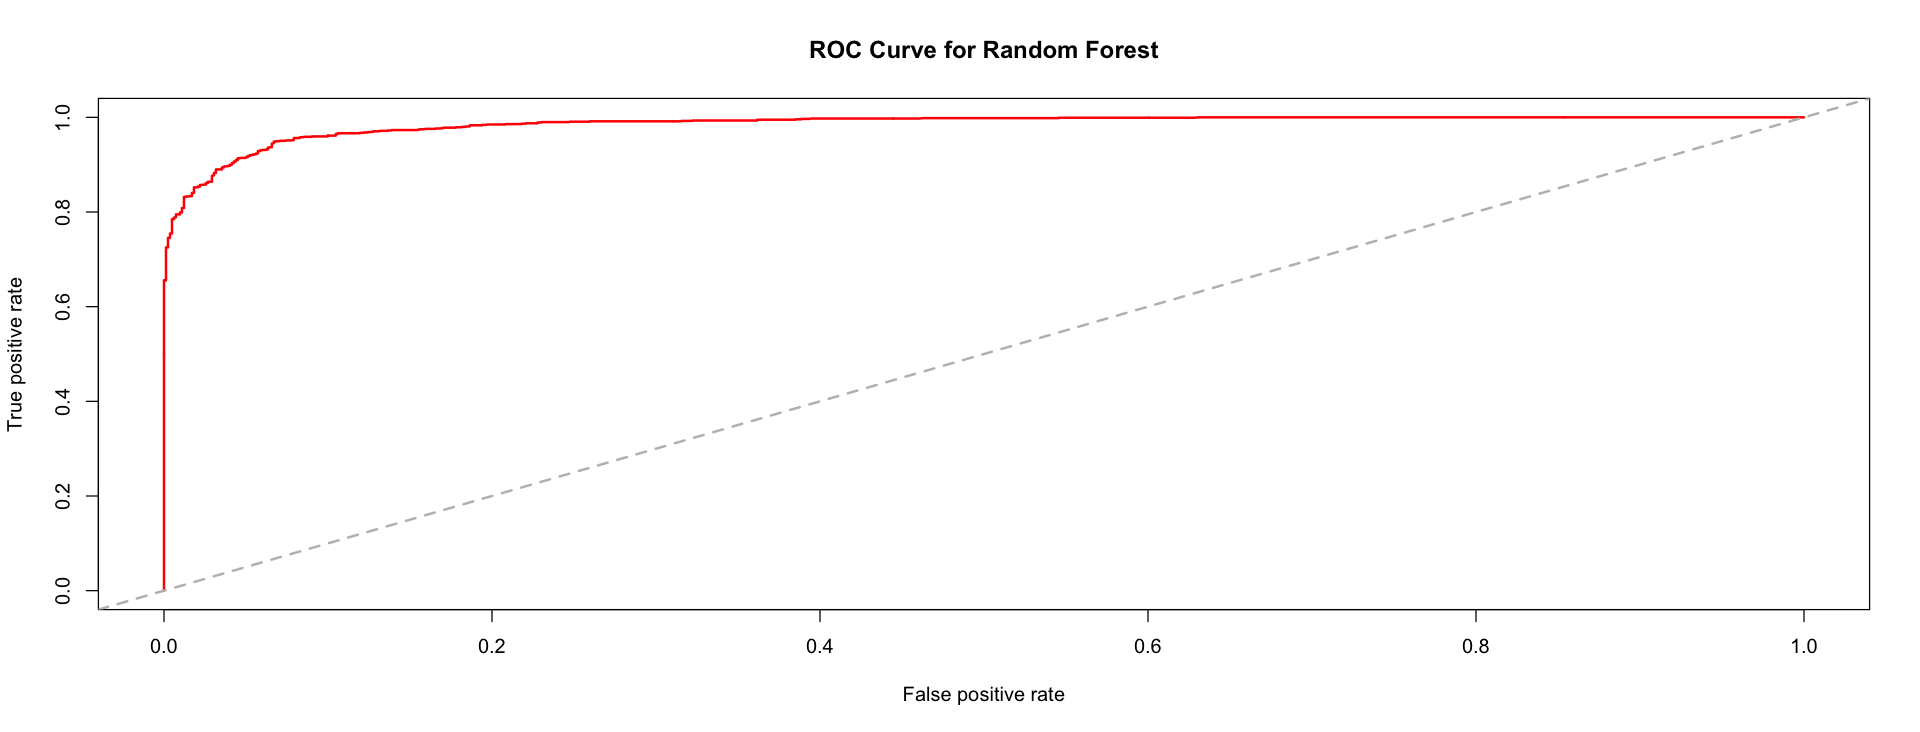

In [141]:
pred1=predict(rf.cda22,type = "prob")
perf = prediction(pred1[,2], cda2.data$cda2)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")


## Currently drinks round 3

In [143]:
rf.cda3<-randomForest(formula=cda3.data$cda3~., data=cda3.data,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.cda3


Call:
 randomForest(formula = cda3.data$cda3 ~ ., data = cda3.data,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.08%
Confusion matrix:
               does not drink drinks class.error
does not drink            470     43  0.08382066
drinks                     19   1479  0.01268358

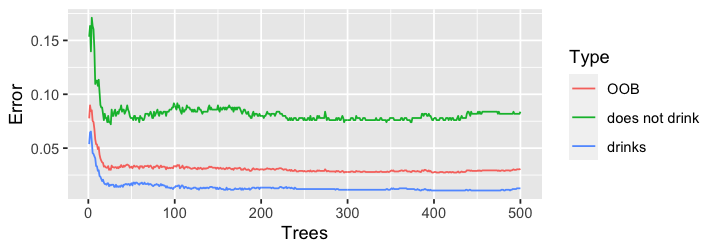

In [151]:
#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data31<-data.frame( 
    Trees=rep(1:nrow(rf.cda3$err.rate), times=3),
    Type=rep(c("OOB", "does not drink", "drinks"), each=nrow(rf.cda3$err.rate)),
    Error=c(rf.cda3$err.rate[,"OOB"],
           rf.cda3$err.rate[,"does not drink"],
           rf.cda3$err.rate[,'drinks']))
ggplot(data=oob.error.data31, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=6, repr.plot.height=2)


Call:
 randomForest(formula = cda3.data$cda3 ~ ., data = cda3.data[-1],      proximity = T, ntree = 1000, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 2.83%
Confusion matrix:
               does not drink drinks class.error
does not drink            474     39  0.07602339
drinks                     18   1480  0.01201602

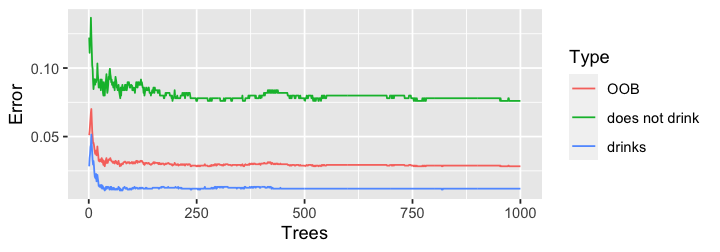

In [150]:
rff.cda3<-randomForest(formula=cda3.data$cda3~., data=cda3.data[-1],proximity=T, ntree=1000, importance=T, mtry=4)
rff.cda3

oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rff.cda3$err.rate), times=3),
    Type=rep(c("OOB", "does not drink", "drinks"), each=nrow(rff.cda3$err.rate)),
    Error=c(rff.cda3$err.rate[,"OOB"],
           rff.cda3$err.rate[,"does not drink"],
           rff.cda3$err.rate[,'drinks']))

#To see if 1000 trees decrease the error rate
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=6, repr.plot.height=2.1)

[1] 0.23073098 0.04077573 0.03331676 0.02884137 0.02685231 0.02536052
 [7] 0.02585778 0.02486325 0.02486325 0.02635505 0.02536052 0.02834411
[13] 0.02585778 0.02734958 0.02734958 0.02635505 0.02983590

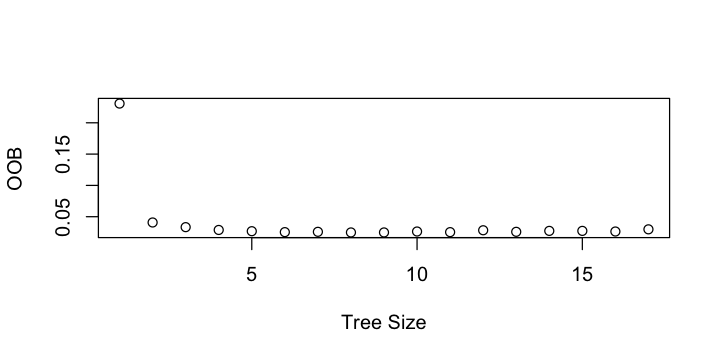

In [146]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=17)
for (i in 1:17) {
    temp.model<-randomForest(cda3.data$cda3~., data=cda3.data, mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=4)

In [147]:
tuneRF(cda3.data, cda3.data$cda3, ntree=1000)

mtry = 4  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


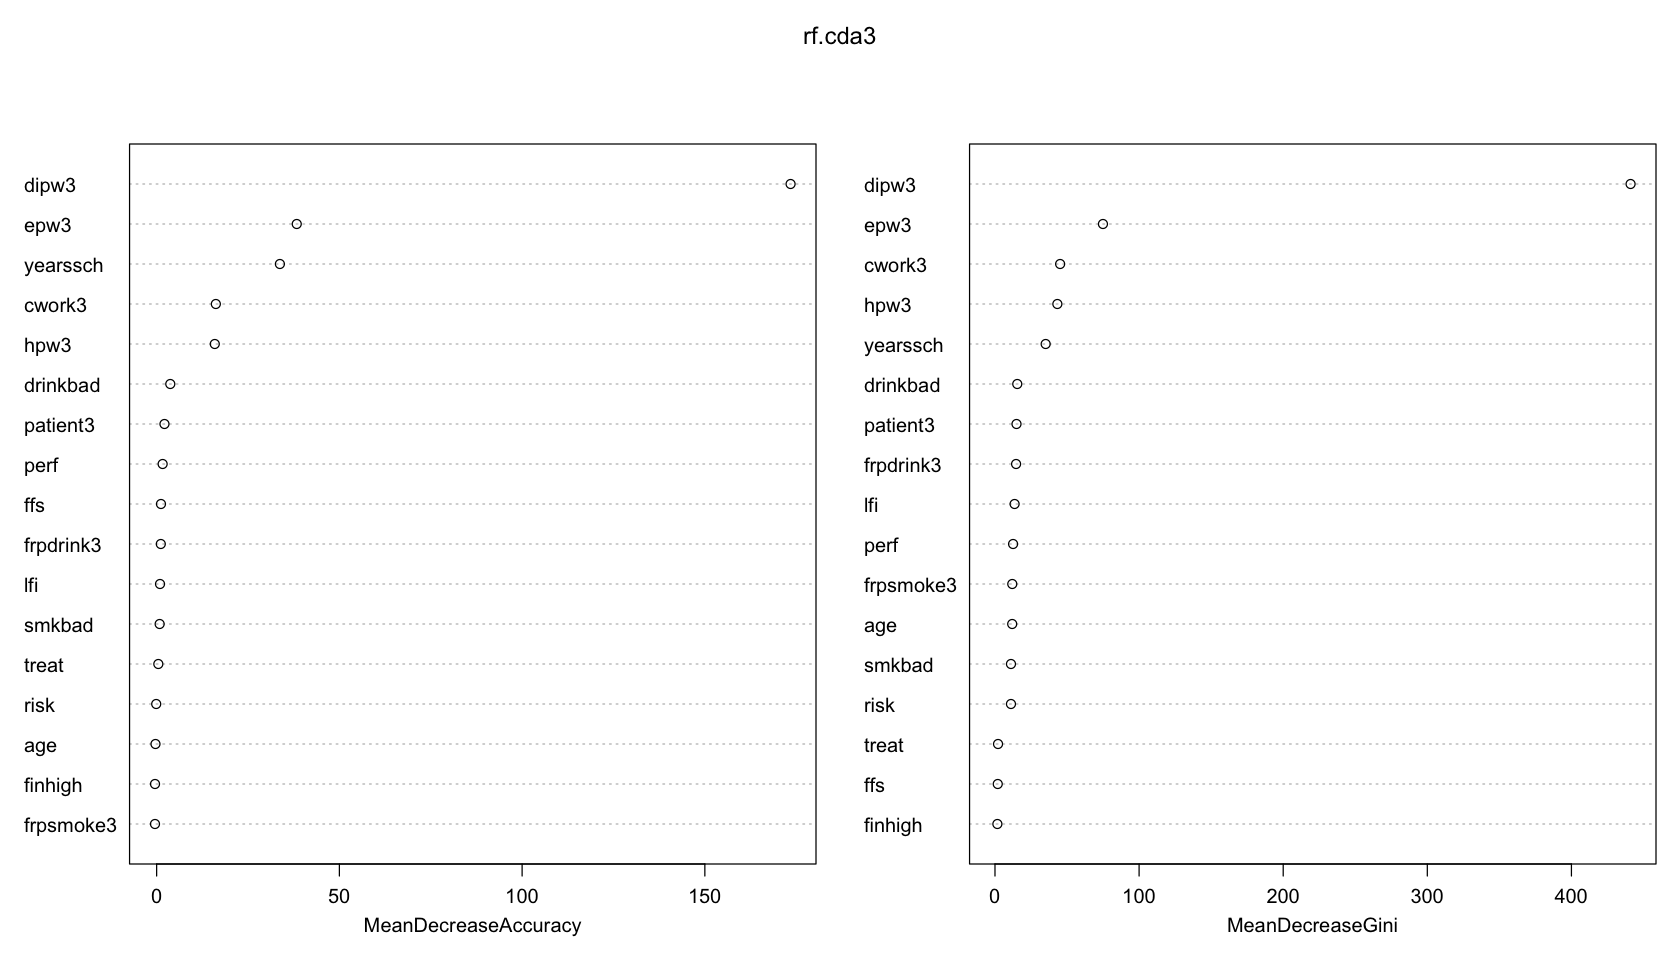

In [156]:
varImpPlot(rf.cda3)
#options(repr.plot.width=14, repr.plot.height=8)

In [157]:
n=2011
cda3.test<-dgp.cda3(n)
rf.cda3.pred<-predict(rf.cda3, cda3.test)
confusionMatrix(rf.cda3.pred, cda3.test$cda3)

Confusion Matrix and Statistics

                Reference
Prediction       does not drink drinks
  does not drink            472     17
  drinks                     23   1499
                                         
               Accuracy : 0.9801         
                 95% CI : (0.973, 0.9858)
    No Information Rate : 0.7539         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9462         
                                         
 Mcnemar's Test P-Value : 0.4292         
                                         
            Sensitivity : 0.9535         
            Specificity : 0.9888         
         Pos Pred Value : 0.9652         
         Neg Pred Value : 0.9849         
             Prevalence : 0.2461         
         Detection Rate : 0.2347         
   Detection Prevalence : 0.2432         
      Balanced Accuracy : 0.9712         
                                         
       'Positive' Class : 

A performance instance
  'Area under the ROC curve'

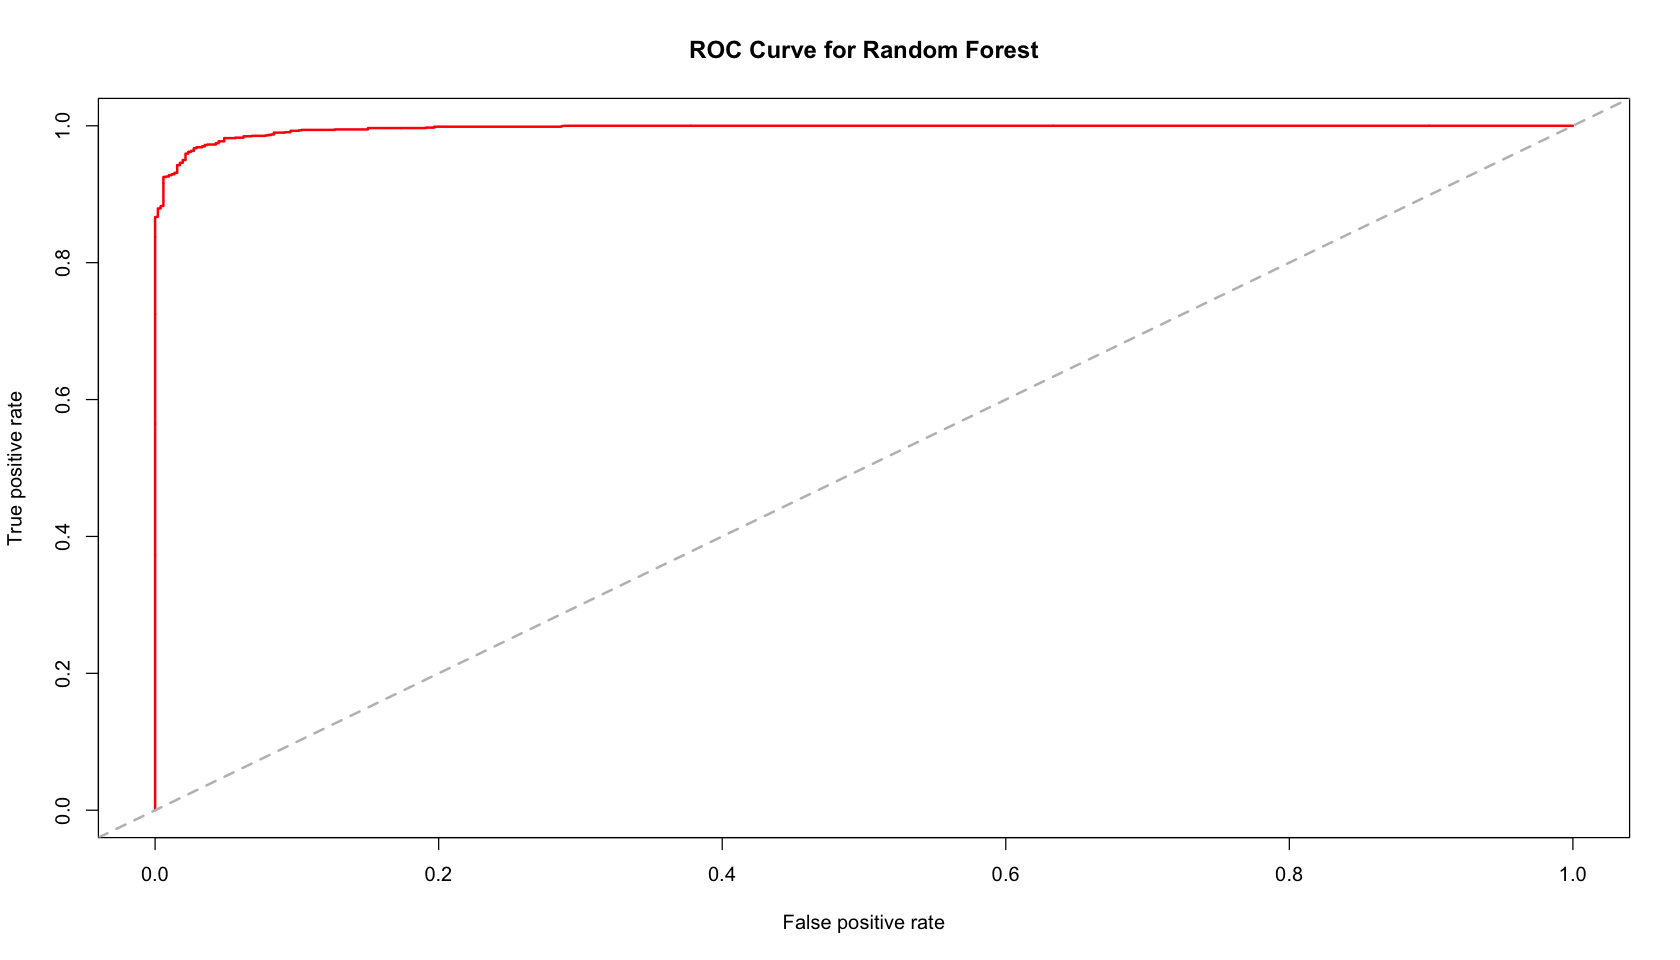

In [158]:
pred1=predict(rf.cda3,type = "prob")
perf = prediction(pred1[,2], cda3.data$cda3)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

##### Currently smokes round 2 


Call:
 randomForest(formula = csmoke2.data$csmoke2 ~ ., data = csmoke2.data[-1],      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.14%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1890     11 0.005786428
smokes                     32     78 0.290909091

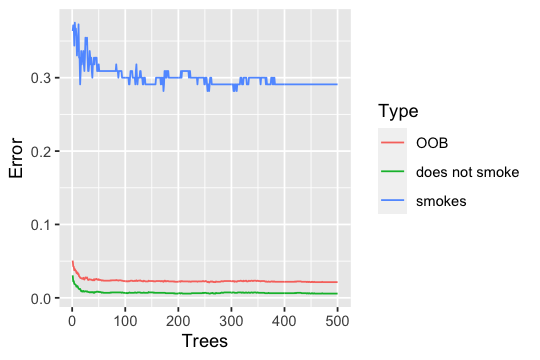

In [165]:
rf.csmoke2<-randomForest(formula=csmoke2.data$csmoke2~., data=csmoke2.data[-1],proximity=T, importance=T)
rf.csmoke2
#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.csmoke2$err.rate), times=3),
    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rf.csmoke2$err.rate)),
    Error=c(rf.csmoke2$err.rate[,"OOB"],
           rf.csmoke2$err.rate[,"does not smoke"],
           rf.csmoke2$err.rate[,'smokes']))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=4.5, repr.plot.height=3)

In [166]:
tuneRF(csmoke2.data, csmoke2.data$csmoke2, ntree=1000)

mtry = 3  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


[1] 0.05370462 0.02138240 0.02187966 0.02237693 0.02088513 0.02088513
 [7] 0.02038787 0.02088513 0.01939334 0.01989060 0.02038787 0.01889607

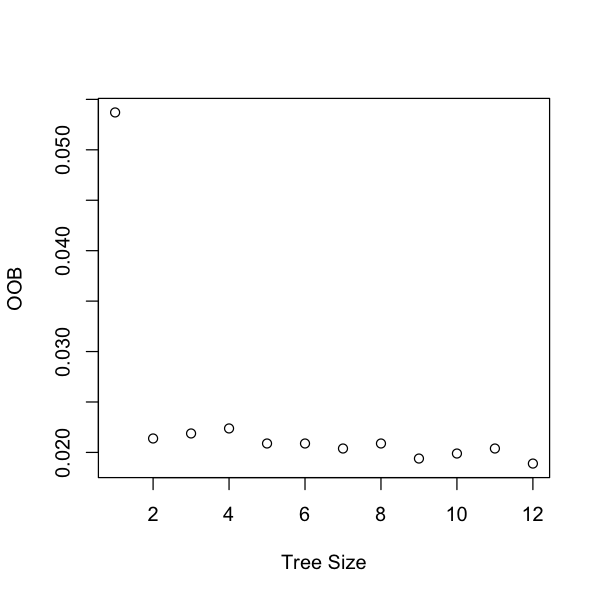

In [170]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=12)
for (i in 1:12) {
    temp.model<-randomForest(csmoke2.data$csmoke2~., data=csmoke2.data[-1], mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=4)

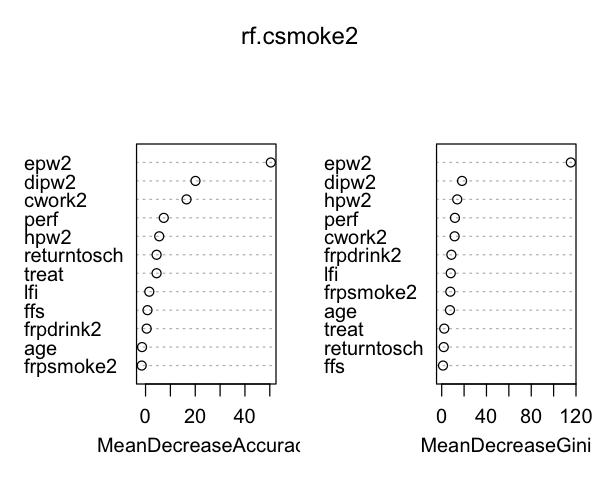

In [171]:
varImpPlot(rf.csmoke2)
options(repr.plot.width=14, repr.plot.height=6)

In [172]:
n=2011
csmoke2.test<-dgp.csmoke2(n)
rf.csmoke2.pred<-predict(rf.csmoke2, csmoke2.test)
confusionMatrix(rf.csmoke2.pred, csmoke2.test$csmoke2)

Confusion Matrix and Statistics

                Reference
Prediction       does not smoke smokes
  does not smoke           1883     27
  smokes                      8     93
                                          
               Accuracy : 0.9826          
                 95% CI : (0.9759, 0.9878)
    No Information Rate : 0.9403          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8325          
                                          
 Mcnemar's Test P-Value : 0.002346        
                                          
            Sensitivity : 0.9958          
            Specificity : 0.7750          
         Pos Pred Value : 0.9859          
         Neg Pred Value : 0.9208          
             Prevalence : 0.9403          
         Detection Rate : 0.9364          
   Detection Prevalence : 0.9498          
      Balanced Accuracy : 0.8854          
                                          
       

A performance instance
  'Area under the ROC curve'

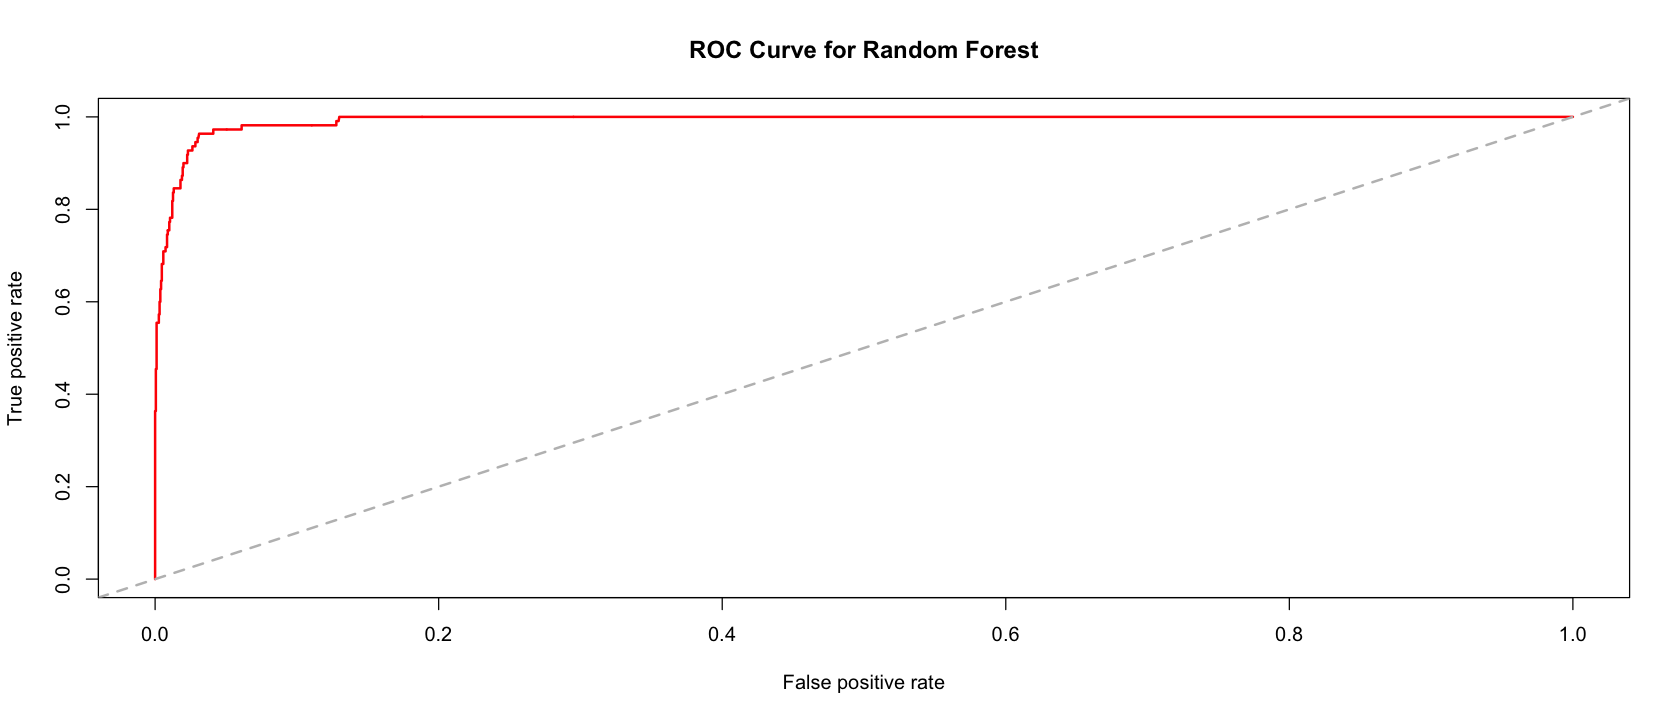

In [173]:
pred1=predict(rf.csmoke2,type = "prob")
perf = prediction(pred1[,2], csmoke2.data$csmoke2)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

##### Currently smokes round 3


Call:
 randomForest(formula = csmoke3.data$csmoke3 ~ ., data = csmoke3.data[-1],      proximity = T, importance = T, ntree = 500, mtry = 7) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 4.53%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1316     39  0.02878229
smokes                     52    604  0.07926829

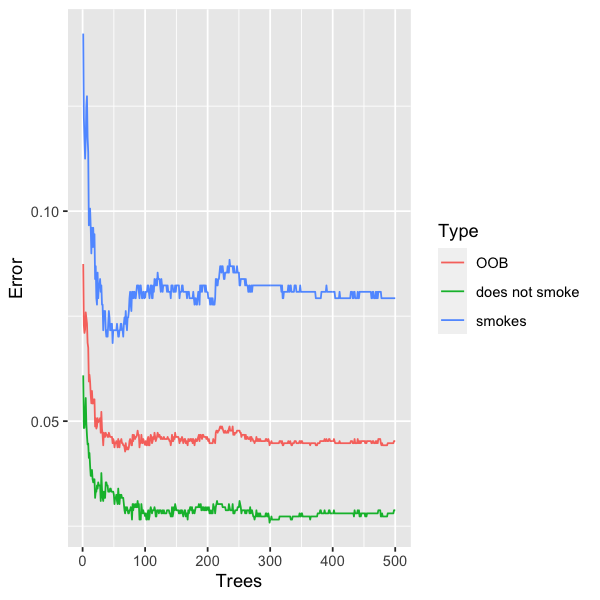

In [192]:
rf.csmoke3<-randomForest(formula=csmoke3.data$csmoke3~., data=csmoke3.data[-1],proximity=T, importance=T, ntree=500, mtry=7)
rf.csmoke3

#To see if 500 trees is enough for optimal classification, we can plot the error rates
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.csmoke3$err.rate), times=3),
    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rf.csmoke3$err.rate)),
    Error=c(rf.csmoke3$err.rate[,"OOB"],
           rf.csmoke3$err.rate[,"does not smoke"],
           rf.csmoke3$err.rate[,'smokes']))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
#options(repr.plot.width=4.5, repr.plot.height=3)


Call:
 randomForest(formula = csmoke3.data$csmoke3 ~ ., data = csmoke3.data[-1],      proximity = T, importance = T, ntree = 1000, mtry = 7) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 4.53%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1317     38  0.02804428
smokes                     53    603  0.08079268

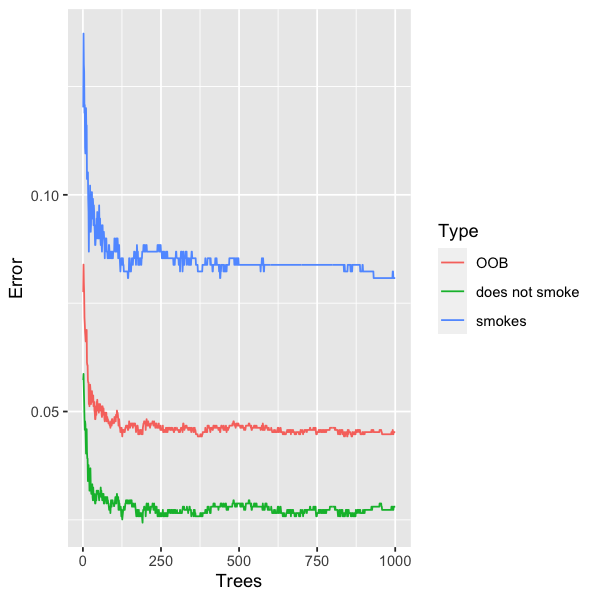

In [191]:
rf.csmoke32<-randomForest(formula=csmoke3.data$csmoke3~., data=csmoke3.data[-1],proximity=T, importance=T, ntree=1000, mtry=7)
rf.csmoke32

#To see if 1000 trees improves the results
oob.error.data<-data.frame( 
    Trees=rep(1:nrow(rf.csmoke32$err.rate), times=3),
    Type=rep(c("OOB", "does not smoke", "smokes"), each=nrow(rf.csmoke32$err.rate)),
    Error=c(rf.csmoke32$err.rate[,"OOB"],
           rf.csmoke32$err.rate[,"does not smoke"],
           rf.csmoke32$err.rate[,'smokes']))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))

In [178]:
tuneRF(csmoke3.data, csmoke3.data$csmoke3)

mtry = 4  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0.2% 
-Inf 0.05 
Searching right ...
mtry = 8 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


[1] 0.07110890 0.05818001 0.04922924 0.04574838 0.04525112 0.04425659
 [7] 0.04375932 0.04425659 0.04375932 0.04375932 0.04674291 0.04624565
[13] 0.04525112 0.04525112 0.04922924 0.04724018 0.04972650

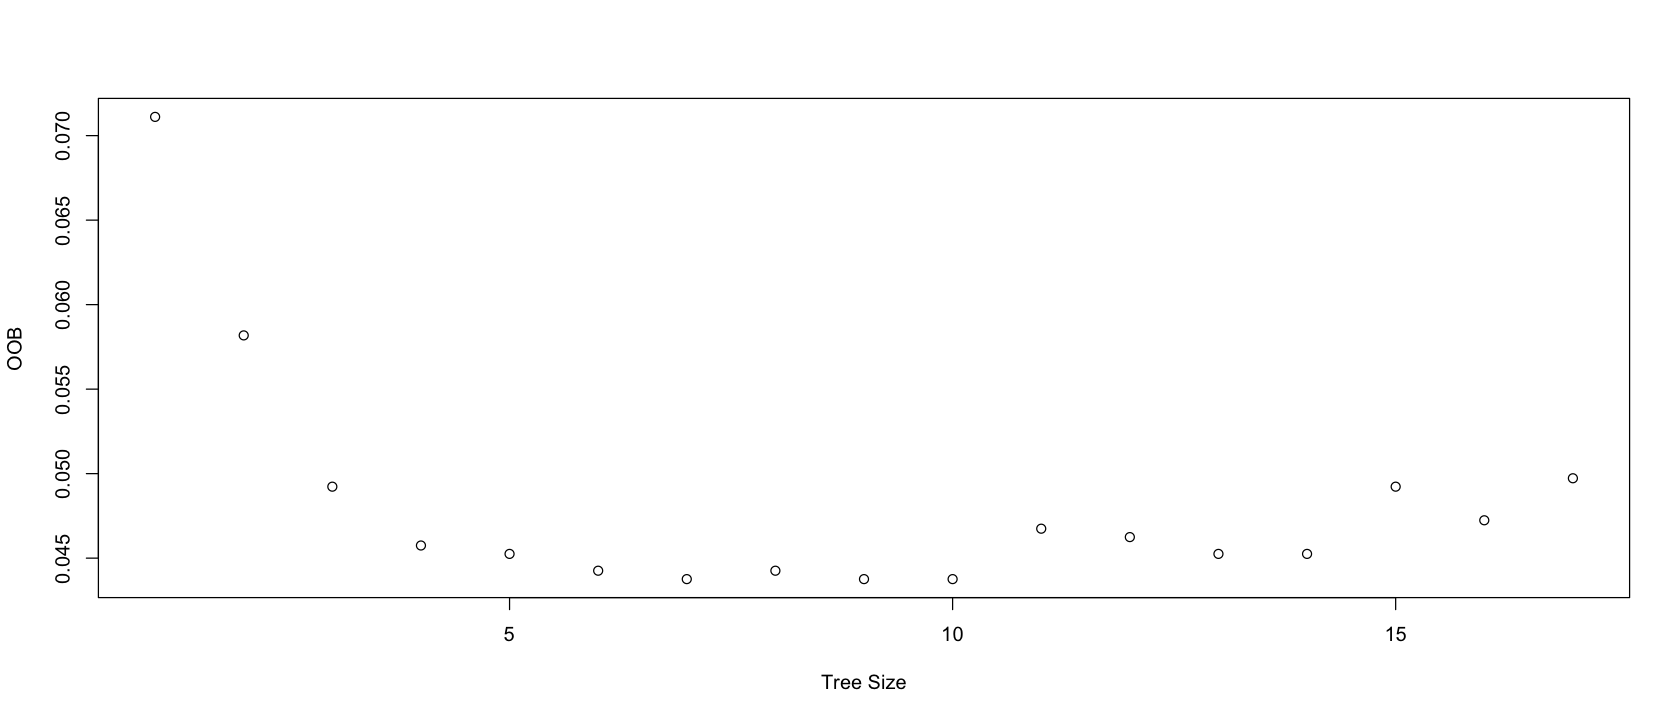

In [185]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=17)
for (i in 1:17) {
    temp.model<-randomForest(csmoke3.data$csmoke3~., data=csmoke3.data[-1], mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

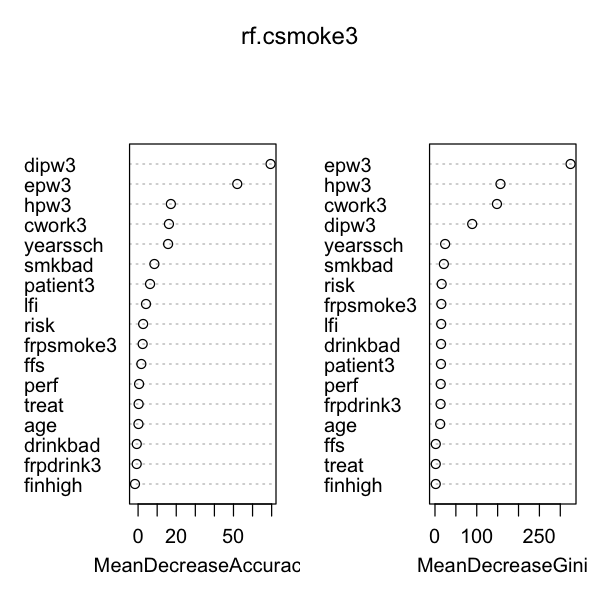

In [186]:
varImpPlot(rf.csmoke3)
#options(repr.plot.width=14, repr.plot.height=6)

A performance instance
  'Area under the ROC curve'

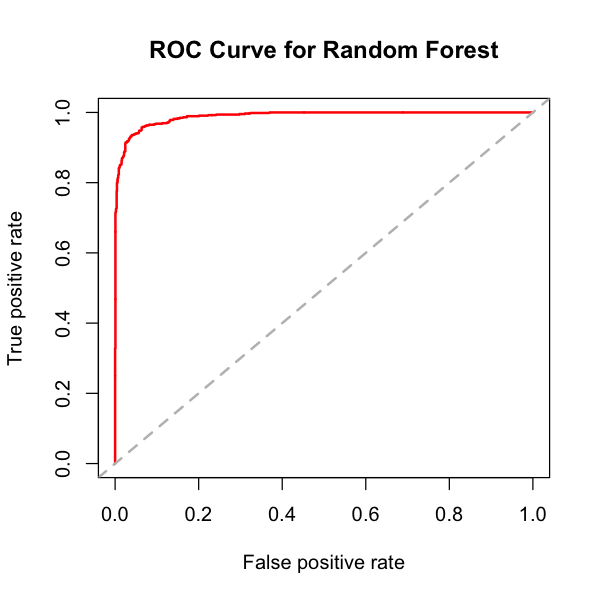

In [187]:
pred1=predict(rf.csmoke3,type = "prob")
perf = prediction(pred1[,2], csmoke3.data$csmoke3)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

## Discussion

The OOB error is often claimed to be an unbiased estimator for the true error rate (Breiman;
2001; Goldstein et al.; 2011; Zhang et al.; 2010). However, for two-class classification problems
it was reported that the OOB error overestimates the true prediction error (Bylander; 2002;
Mitchell; 2011).  It was thus recommended to
use the OOB error only as an upper bound for the true prediction error (Mitchell; 2011). However,
Mitchell (2011) considered only settings with completely balanced samples, sample sizes below 60
and two response classes, limiting the generality of the results.

The size of this subset is usually referred to as mtry. In practical applications, the most common
approach for choosing appropriate values for mtry is to select the value over a grid of plausible
values which yields the smallest OOB error (Oliveira et al.; 2012; Hassane et al.; 2008; Nicodemus
et al.; 2010). Also in works on RF methodology, the OOB error has frequently been used to choose
an appropriate value for mtry (Nicodemus and Malley; 2009; Kim et al.; 2006). In principle, other
procedures like (repeated) cross-validation may be applied for selecting an optimal value for mtry,
but the OOB error is usually the first choice for parameter tuning.

It is well
known that classification trees are greatly affected by class imbalance in the sense that trees that
were trained on unbalanced samples preferentially classify new observations into the class from
which most training observations come. 

With respect to data-dependent factors, the present studies identified the response class distribution of the original sample, the predictor number, the correlation between predictors as well
as their predictive ability as relevant factors that have an effect on the bias.

### Counclusion

### Droncew - Drinks at least once a week round 2


Call:
 randomForest(formula = Y2.train$droncew2 ~ ., data = X2.train,      proximity = T, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 19.6%
Confusion matrix:
                           does not drink once a week drinks once a week
does not drink once a week                       1132                  3
drinks once a week                                273                  0
                           class.error
does not drink once a week 0.002643172
drinks once a week         1.000000000

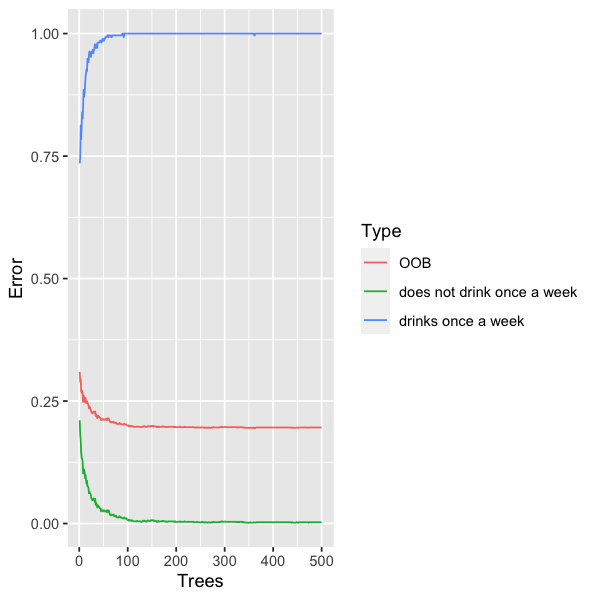

In [84]:
source('auxiliary/droncew2.r')
rf.droncew2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3.1)

[1] 0.1938920 0.1938920 0.1946023 0.1953125 0.1960227 0.1960227 0.1960227
 [8] 0.1981534 0.1974432 0.1974432

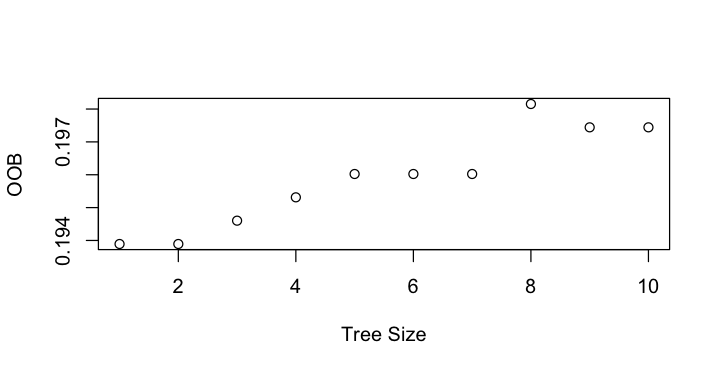

In [85]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$droncew2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Drevd Drinks every day round 2 


Call:
 randomForest(formula = Y2.train$drevd2 ~ ., data = X2.train,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.85%
Confusion matrix:
                         does not drink every day drinks every day class.error
does not drink every day                     1382                0           0
drinks every day                               26                0           1

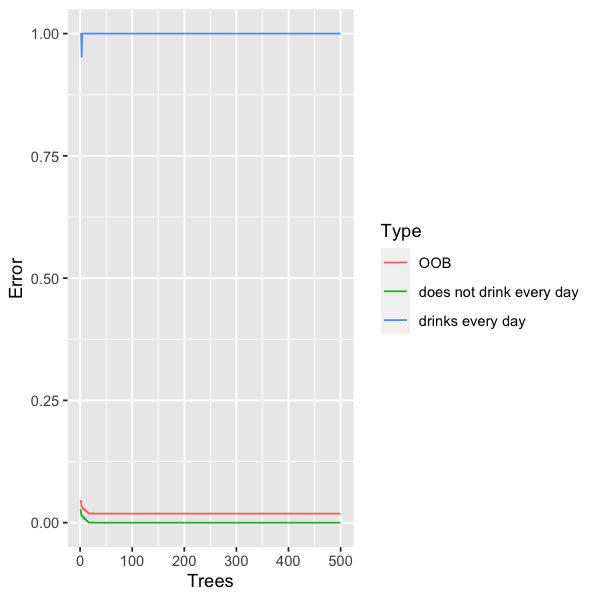

In [86]:
source('auxiliary/drevd2.r')
rf.drevd2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.1)

##### Drinking frequency round 2

In [87]:
rf.drfr2<-randomForest(formula=Y2.train$drfr2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.drfr2



Call:
 randomForest(formula = Y2.train$drfr2 ~ ., data = X2.train, proximity = T,      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 41.12%
Confusion matrix:
  1   2  3 4 class.error
1 3 242  2 0   0.9878543
2 3 823 11 0   0.0167264
3 1 301  3 0   0.9901639
4 1  18  0 0   1.0000000

mtry = 3  OOB error = 44.6% 
Searching left ...
mtry = 2 	OOB error = 42.9% 
0.03821656 0.05 
Searching right ...
mtry = 6 	OOB error = 44.46% 
0.003184713 0.05 


,mtry,OOBError
2.OOB,2,0.4289773
3.OOB,3,0.4460227
6.OOB,6,0.4446023


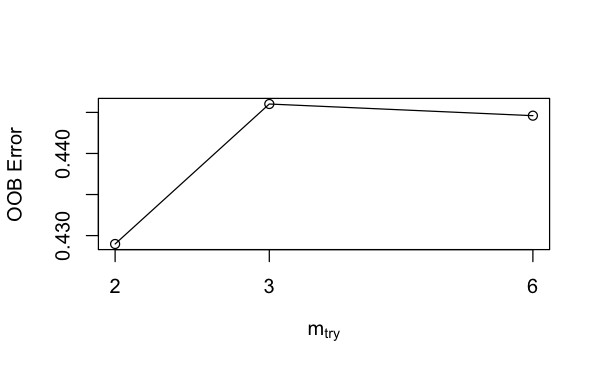

In [88]:
tuneRF(X2.train, Y2.train$drfr2)